## 230968336
## Sameer Raj
## WEEK-4
## Q-1

# Face Mask Dataset

## Required Imports

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, EfficientNetB0, MobileNetV2

## Organizing Diretories

In [2]:
base_dir = "Face Mask Dataset"
train_dir = f"{base_dir}/Train"
validation_dir = f"{base_dir}/Validation"
test_dir = f"{base_dir}/Test"

## Preprocessing for LeNet-5 (Input image size - 199x199)

In [3]:
batch_size = 20

train_datagen_128 = ImageDataGenerator(rescale=1./255)
val_datagen_128 = ImageDataGenerator(rescale=1./255)
test_datagen_128 = ImageDataGenerator(rescale=1./255)

train_generator_128 = train_datagen_128.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_128 = val_datagen_128.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_128 = test_datagen_128.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Preprocessing for AlexNet (Input image size - 227x227)

In [4]:
train_datagen_227 = ImageDataGenerator(rescale=1./255)
val_datagen_227 = ImageDataGenerator(rescale=1./255)
test_datagen_227 = ImageDataGenerator(rescale=1./255)

train_generator_227 = train_datagen_227.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_227 = val_datagen_227.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_227 = test_datagen_227.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Defining LeNet-5 Model

In [7]:
LeNet5_model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(6, kernel_size=5, padding="same", activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(120, activation="tanh"),
    Dense(84, activation="tanh"),
    Dense(2, activation="softmax")
])

## Compiling LeNet-5

In [8]:
LeNet5_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

## Training LeNet-5

In [9]:
LeNet5_history = LeNet5_model.fit(
    train_generator_128,
    validation_data=val_generator_128,
    epochs=20
)

Epoch 1/20


c:\Users\Kewal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.8499 - loss: 0.3594 - val_accuracy: 0.9625 - val_loss: 0.1176
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9812 - val_loss: 0.0674
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9806 - loss: 0.0575 - val_accuracy: 0.9762 - val_loss: 0.0629
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9770 - loss: 0.0649 - val_accuracy: 0.9663 - val_loss: 0.1022
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9739 - loss: 0.0802 - val_accuracy: 0.9800 - val_loss: 0.0527
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.9688 - val_loss: 0.0810
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9801 - loss: 0.0609 - val_accuracy: 0.9800 - val_loss: 0.0610
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9797 - loss: 0.0589 - val_accurac

## Evaluating LeNet-5

In [10]:
loss_lenet, acc_lenet = LeNet5_model.evaluate(test_generator_128)
print(f"LeNet-5 Test accuracy: {acc_lenet:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9567 - loss: 0.1134
LeNet-5 Test accuracy: 0.9597


Here LeNet-5 gives good accuracy

## LeNet-5 Summary

In [11]:
LeNet5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,728,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,223,980 (19.93 MB)

 Trainable params: 1,741,326 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,482,654 (13.29 MB)

## Defining AlexNet Model

In [12]:
AlexNet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

## Compiling AlexNet

In [13]:
AlexNet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Training AlexNet

In [14]:
AlexNet_history = AlexNet_model.fit(
    train_generator_227,
    validation_data=val_generator_227,
    epochs=20
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 319s 633ms/step - accuracy: 0.7723 - loss: 0.6085 - val_accuracy: 0.9350 - val_loss: 0.1851
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 315s 629ms/step - accuracy: 0.9276 - loss: 0.1999 - val_accuracy: 0.9463 - val_loss: 0.1559
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 642ms/step - accuracy: 0.9354 - loss: 0.1729 - val_accuracy: 0.9312 - val_loss: 0.1651
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 641ms/step - accuracy: 0.9512 - loss: 0.1297 - val_accuracy: 0.9538 - val_loss: 0.1244
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 327s 654ms/step - accuracy: 0.9451 - loss: 0.1446 - val_accuracy: 0.9475 - val_loss: 0.1654
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 326s 651ms/step - accuracy: 0.9585 - loss: 0.1186 - val_accuracy: 0.9588 - val_loss: 0.1038
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 642ms/step - accuracy: 0.9597 - loss: 0.1206 - val_accuracy: 0.9663 - val_loss: 0.0774
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 313s 626ms/step - accuracy: 0.9487 -

## Evaluating AlexNet

In [15]:
print("Evaluating AlexNet on test data:")
loss_alexnet, acc_alexnet = AlexNet_model.evaluate(test_generator_227)
print(f"AlexNet Test accuracy: {acc_alexnet:.4f}")

Evaluating AlexNet on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9678 - loss: 0.1476
AlexNet Test accuracy: 0.9738


AlexNet also gives good accuracy

## AlexNet summary

In [16]:
AlexNet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,868,616 (667.07 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,579,078 (444.71 MB)

Inference : AlexNet has more parameters than LeNet5 due to more layers and complex architecture

## Plotting accuracy and loss for LeNet-5 and AlexNet

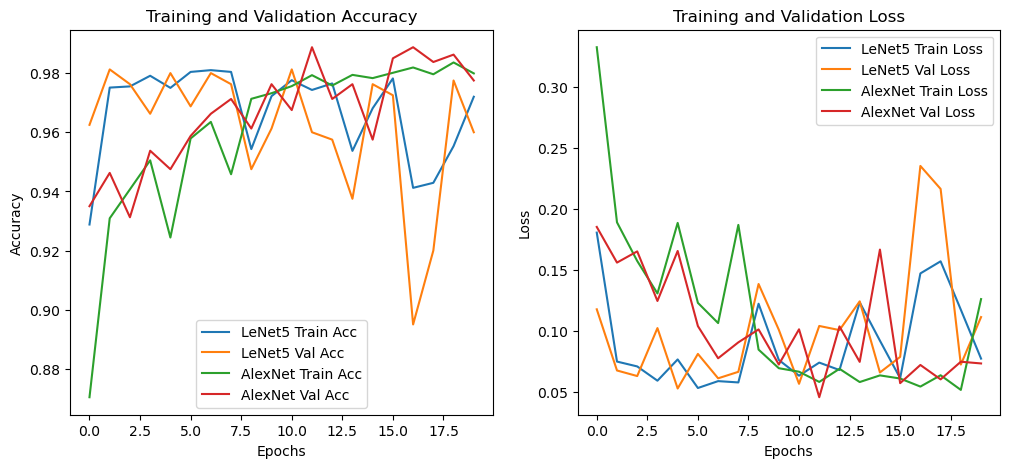

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LeNet5_history.history['accuracy'], label='LeNet5 Train Acc')
plt.plot(LeNet5_history.history['val_accuracy'], label='LeNet5 Val Acc')
plt.plot(AlexNet_history.history['accuracy'], label='AlexNet Train Acc')
plt.plot(AlexNet_history.history['val_accuracy'], label='AlexNet Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(LeNet5_history.history['loss'], label='LeNet5 Train Loss')
plt.plot(LeNet5_history.history['val_loss'], label='LeNet5 Val Loss')
plt.plot(AlexNet_history.history['loss'], label='AlexNet Train Loss')
plt.plot(AlexNet_history.history['val_loss'], label='AlexNet Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Inference : Accuracy is mostly increasing with epochs and loss is mostly decreasing with epochs, which is the desired/expected result